In [1]:
# Importing the necessary models

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from numpy import where

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import os
from tensorflow import keras

from numpy.random import seed
seed(42)
import tensorflow as tf
tf.random.set_seed(42)

In [3]:
headers = ['remove',"Frequency", "Amplitude",'Duration','Velocity']
df = pd.DataFrame()


dir = r'C:\Users\pnanp\Desktop\Minor.AI4S.S6\Personal Project\Data\Features 2'
for file in os.listdir(dir):
    path=os.path.join(dir, file)
    medium = pd.read_csv(path ,sep=" ", names = headers, index_col = False).drop(columns = ['remove'])
    medium['State'] = file
    df = df.append(medium, ignore_index = True)

In [4]:
# Splitting the State column to get the state and participant

Participant = []

for i in df.index:
    p = 0
    p = df.iloc[i, 4].split('s')[1].split('.')[0]
    df.iloc[i, 4] = df.iloc[i, 4].split('s')[0]
    Participant.append(int(p))

df['Participant'] = Participant
df['State'] = pd.to_numeric(df.State)
# df.reset_index(level=0, inplace=True)

df.head()

,Frequency,Amplitude,Duration,Velocity,State,Participant
0,1.5385,0.0598,8.0,0.0157,0,1
1,1.6304,0.0561,13.0,0.0176,0,1
2,1.1765,0.0305,6.0,0.0109,0,1
3,1.1933,0.0332,4.0,0.0025,0,1
4,1.3393,0.0480,7.0,0.0205,0,1


In [5]:
# Viewing the dataframe's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4797 entries, 0 to 4796
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Frequency    4797 non-null   float64
 1   Amplitude    4797 non-null   float64
 2   Duration     4797 non-null   float64
 3   Velocity     4797 non-null   float64
 4   State        4797 non-null   int64  
 5   Participant  4797 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 225.0 KB


Text(0.5, 1.0, 'Velocity')

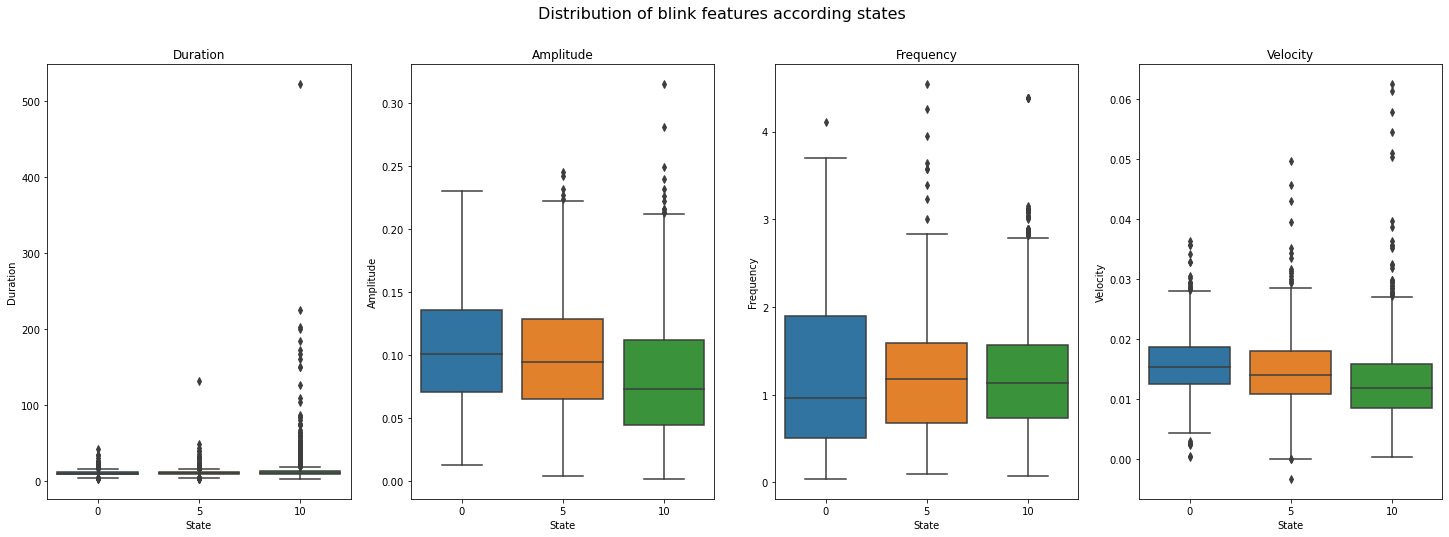

In [28]:
# Plotting the distribution of blink features by states

fig,ax = plt.subplots(1,4,figsize = (25,8))
fig.suptitle('Distribution of blink features according states', size = 16)

sns.boxplot(x = 'State', y="Duration",data=df, ax = ax[0])
ax[0].set_title('Duration')

sns.boxplot(x = 'State', y="Amplitude",data=df, ax = ax[1])
ax[1].set_title('Amplitude')

sns.boxplot(x = 'State', y="Frequency",data=df, ax = ax[2])
ax[2].set_title('Frequency')

sns.boxplot(x = 'State', y="Velocity",data=df, ax = ax[3])
ax[3].set_title('Velocity')

In [29]:
# Splitting data into features and target
y = df.State
X = df[['Amplitude','Frequency','Duration', 'Velocity']]

# summarize class distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=1254 (26.141%)
Class=10, n=1777 (37.044%)
Class=5, n=1766 (36.815%)


In [30]:
# Normalize and split data into train and test sets
X = preprocessing.normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state = 42)

#### Naive Bayes

In [31]:
# Training
blinkNB = ComplementNB()
blinkNB.fit(X_train, y_train)
y_pred = blinkNB.predict(X_test)
NBA = round(accuracy_score(y_test, y_pred)*100,2)

# Printing evaluation statistics
print('Classification report')
print('-------------------------------')
print(classification_report(y_test, y_pred))
print('_______________________________')
print('Accuracy: {}%'.format(NBA))

Classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.35      0.18      0.24       439
           5       0.34      0.51      0.40       576
          10       0.37      0.32      0.34       569

    accuracy                           0.35      1584
   macro avg       0.35      0.34      0.33      1584
weighted avg       0.35      0.35      0.34      1584

_______________________________
Accuracy: 34.91%


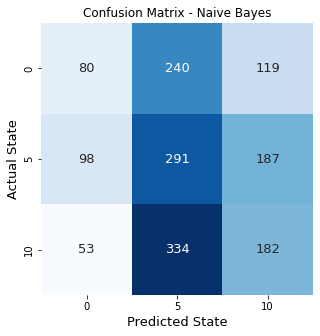

In [32]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar= False, square = True, 
                      fmt = 'g', annot_kws = {'size': 13})

ax.set_title('Confusion Matrix - Naive Bayes')
ax.set_xlabel('Predicted State', size = 13)
ax.set_ylabel('Actual State', size = 13)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','5', '10'])
ax.yaxis.set_ticklabels(['0','5', '10'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### KNN

In [33]:
# Training
blinkKNN = KNeighborsClassifier()
blinkKNN.fit(X_train, y_train)
y_pred = blinkKNN.predict(X_test)
KNNA = round(accuracy_score(y_test, y_pred)*100,2)

# Printing evaluation statistics
print('Classification report')
print('-------------------------------')
print(classification_report(y_test, y_pred))
print('_______________________________')
print('Accuracy: {}%'.format(KNNA))

Classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.44      0.50      0.47       439
           5       0.45      0.47      0.46       576
          10       0.51      0.43      0.46       569

    accuracy                           0.46      1584
   macro avg       0.47      0.47      0.46      1584
weighted avg       0.47      0.46      0.46      1584

_______________________________
Accuracy: 46.34%


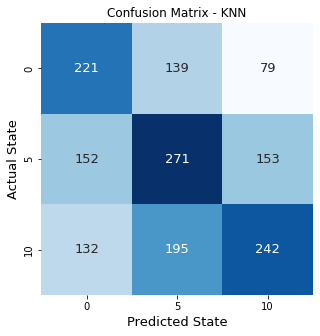

In [34]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar= False, square = True, 
                      fmt = 'g', annot_kws = {'size': 13})

ax.set_title('Confusion Matrix - KNN')
ax.set_xlabel('Predicted State', size = 13)
ax.set_ylabel('Actual State', size = 13)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','5', '10'])
ax.yaxis.set_ticklabels(['0','5', '10'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [35]:
param = [
    {'n_neighbors':  [5,10,15],
     'weights': ['uniform', 'distance'],
     'p':[1,2]}
]

gridKNN = GridSearchCV(KNeighborsClassifier(), param_grid = param, scoring = 'accuracy')
gridKNN_result = gridKNN.fit(X_train,y_train)

print("Best: %f using %s" % (gridKNN_result.best_score_, gridKNN_result.best_params_))
means = gridKNN_result.cv_results_['mean_test_score']
params = gridKNN_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

Best: 0.507918 using {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
0.481781 with: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.489554 with: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.473382 with: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.483025 with: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
0.484898 with: {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
0.501695 with: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
0.491124 with: {'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}
0.495472 with: {'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
0.499208 with: {'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
0.507918 with: {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
0.495168 with: {'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}
0.506675 with: {'n_neighbors': 15, 'p': 2, 'weights': 'distance'}


In [36]:
# Training
blinkKNN = gridKNN.best_estimator_
blinkKNN.fit(X_train, y_train)
y_pred = blinkKNN.predict(X_test)

# Printing evaluation statistics
print('Classification report')
print('-------------------------------')
print(classification_report(y_test, y_pred))
print('_______________________________')
print('Accuracy: {}%'.format(KNNA))

Classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.49      0.40      0.44       439
           5       0.46      0.49      0.47       576
          10       0.51      0.55      0.53       569

    accuracy                           0.49      1584
   macro avg       0.49      0.48      0.48      1584
weighted avg       0.49      0.49      0.48      1584

_______________________________
Accuracy: 46.34%


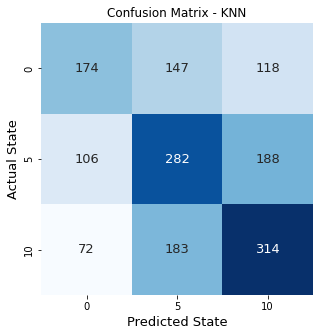

In [37]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar= False, square = True, 
                      fmt = 'g', annot_kws = {'size': 13})

ax.set_title('Confusion Matrix - KNN')
ax.set_xlabel('Predicted State', size = 13)
ax.set_ylabel('Actual State', size = 13)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','5', '10'])
ax.yaxis.set_ticklabels(['0','5', '10'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Random Forest Classifier

In [38]:
# Training
blinkRF = RandomForestClassifier(random_state = 42)
blinkRF.fit(X_train, y_train)
y_pred = blinkRF.predict(X_test)
RFA = round(accuracy_score(y_test, y_pred)*100,2)

# Printing evaluation statistics
print('Classification report')
print('-------------------------------')
print(classification_report(y_test, y_pred))
print('_______________________________')
print('Accuracy: {}%'.format(round(accuracy_score(y_test, y_pred)*100,2)))

Classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.52      0.46      0.49       439
           5       0.47      0.48      0.47       576
          10       0.52      0.56      0.54       569

    accuracy                           0.50      1584
   macro avg       0.50      0.50      0.50      1584
weighted avg       0.50      0.50      0.50      1584

_______________________________
Accuracy: 50.13%


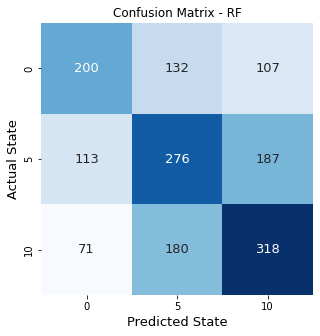

In [39]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar= False, square = True, 
                      fmt = 'g', annot_kws = {'size': 13})

ax.set_title('Confusion Matrix - RF')
ax.set_xlabel('Predicted State', size = 13)
ax.set_ylabel('Actual State', size = 13)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','5', '10'])
ax.yaxis.set_ticklabels(['0','5', '10'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [40]:
param = [
    {'n_estimators': [50,150,250],
     'criterion': ['gini','entropy'],
     'max_depth':[None,1, 2, 3],
     'bootstrap': [True, False],
     'max_features': [1,2,3],
     'warm_start': [True, False]
    }
]

gridRF = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid = param, scoring = 'accuracy')
grid_result = gridRF.fit(X_train,y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

Best: 0.523802 using {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'n_estimators': 250, 'warm_start': True}
0.511661 with: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'n_estimators': 50, 'warm_start': True}
0.511661 with: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'n_estimators': 50, 'warm_start': False}
0.521308 with: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'n_estimators': 150, 'warm_start': True}
0.521308 with: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'n_estimators': 150, 'warm_start': False}
0.523802 with: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'n_estimators': 250, 'warm_start': True}
0.523802 with: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'n_estimators': 250, 'warm_start': False}
0.510725 with: {'bootstrap': True, 'criterion': 

In [41]:
# Training
blinkRF = gridRF.best_estimator_
blinkRF.fit(X_train, y_train)
y_pred = blinkRF.predict(X_test)
RFA = round(accuracy_score(y_test, y_pred)*100,2)

# Printing evaluation statistics
print('Classification report')
print('-------------------------------')
print(classification_report(y_test, y_pred))
print('_______________________________')
print('Accuracy: {}%'.format(round(accuracy_score(y_test, y_pred)*100,2)))

C:\Users\pnanp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:429: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.53      0.45      0.49       439
           5       0.49      0.50      0.49       576
          10       0.53      0.58      0.55       569

    accuracy                           0.51      1584
   macro avg       0.51      0.51      0.51      1584
weighted avg       0.51      0.51      0.51      1584

_______________________________
Accuracy: 51.39%


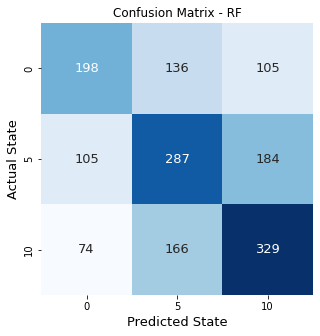

In [42]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar= False, square = True, 
                      fmt = 'g', annot_kws = {'size': 13})

ax.set_title('Confusion Matrix - RF')
ax.set_xlabel('Predicted State', size = 13)
ax.set_ylabel('Actual State', size = 13)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','5', '10'])
ax.yaxis.set_ticklabels(['0','5', '10'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Gradient Boosting

In [43]:
# Training
blinkGB = GradientBoostingClassifier(random_state = 42)
blinkGB.fit(X_train, y_train)
y_pred = blinkGB.predict(X_test)
GBA = round(accuracy_score(y_test, y_pred)*100,2)

# Printing evaluation statistics
print('Classification rep ort')
print('-------------------------------')
print(classification_report(y_test, y_pred))
print('_______________________________')
print('Accuracy: {}%'.format(round(accuracy_score(y_test, y_pred)*100,2)))

Classification rep ort
-------------------------------
              precision    recall  f1-score   support

           0       0.56      0.40      0.47       439
           5       0.47      0.54      0.50       576
          10       0.55      0.59      0.57       569

    accuracy                           0.52      1584
   macro avg       0.53      0.51      0.51      1584
weighted avg       0.53      0.52      0.52      1584

_______________________________
Accuracy: 51.96%


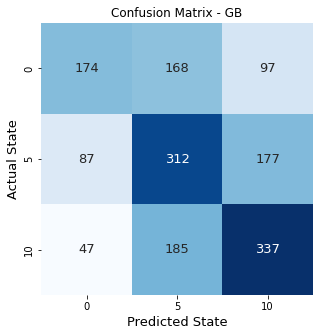

In [44]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar= False, square = True, 
                      fmt = 'g', annot_kws = {'size': 13})

ax.set_title('Confusion Matrix - GB')
ax.set_xlabel('Predicted State', size = 13)
ax.set_ylabel('Actual State', size = 13)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','5', '10'])
ax.yaxis.set_ticklabels(['0','5', '10'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [45]:
param = [
    {
     'criterion': ['friedman_mse','squared_error'],
     'max_depth':[None,1, 2, 3],
     'max_features': [1,2,3],
     'warm_start': [True, False]
    }
]

gridGB = GridSearchCV(GradientBoostingClassifier(random_state = 42), param_grid = param, scoring = 'accuracy')
grid_result = gridGB.fit(X_train,y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

Best: 0.523489 using {'criterion': 'friedman_mse', 'max_depth': 3, 'max_features': 1, 'warm_start': True}
0.497970 with: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 1, 'warm_start': True}
0.497970 with: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 1, 'warm_start': False}
0.494862 with: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 2, 'warm_start': True}
0.494862 with: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 2, 'warm_start': False}
0.484901 with: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 3, 'warm_start': True}
0.484901 with: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 3, 'warm_start': False}
0.498592 with: {'criterion': 'friedman_mse', 'max_depth': 1, 'max_features': 1, 'warm_start': True}
0.498592 with: {'criterion': 'friedman_mse', 'max_depth': 1, 'max_features': 1, 'warm_start': False}
0.503257 with: {'criterion': 'friedman_mse', 'max_depth': 1, 'max_featur

In [46]:
# Training
blinkGB = gridGB.best_estimator_
blinkGB.fit(X_train, y_train)
y_pred = blinkGB.predict(X_test)
GBA = round(accuracy_score(y_test, y_pred)*100,2)

# Printing evaluation statistics
print('Classification report')
print('-------------------------------')
print(classification_report(y_test, y_pred))
print('_______________________________')
print('Accuracy: {}%'.format(round(accuracy_score(y_test, y_pred)*100,2)))

Classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.57      0.41      0.47       439
           5       0.48      0.53      0.51       576
          10       0.55      0.62      0.58       569

    accuracy                           0.53      1584
   macro avg       0.54      0.52      0.52      1584
weighted avg       0.53      0.53      0.53      1584

_______________________________
Accuracy: 52.9%


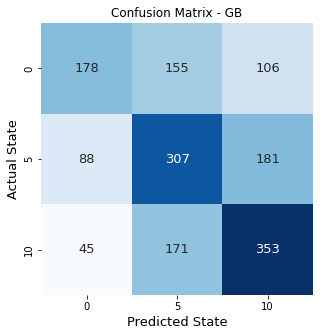

In [47]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar= False, square = True, 
                      fmt = 'g', annot_kws = {'size': 13})

ax.set_title('Confusion Matrix - GB')
ax.set_xlabel('Predicted State', size = 13)
ax.set_ylabel('Actual State', size = 13)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','5', '10'])
ax.yaxis.set_ticklabels(['0','5', '10'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Neural Network

In [48]:
# Splitting data into features and target
y = df.State
X = df[['Amplitude','Frequency','Duration', 'Velocity']]

# Encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# Convert integers to dummy variables 
dummy_y = utils.to_categorical(encoded_Y)
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = 0.33,random_state = 42)
y_test_temp = encoder.inverse_transform(np.argmax(y_test, axis = -1))

# Defining the model
blinkNN = Sequential()
blinkNN.add(Dense(2187, input_dim=4, activation='relu'))
blinkNN.add(Dense(729, activation='relu'))
blinkNN.add(Dense(243, activation='relu'))
blinkNN.add(Dense(81, activation='relu'))
blinkNN.add(Dense(27, activation='relu'))
blinkNN.add(Dense(9, activation='relu'))
blinkNN.add(Dense(3, activation='softmax'))

# Compiling the model 
blinkNN.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

blinkNN.fit(X_train, y_train, epochs=300, batch_size=400, verbose = 0)

y_pred = blinkNN.predict(X_test)
y_pred = encoder.inverse_transform(np.argmax(y_pred, axis = -1))
NNA = round(accuracy_score(y_test_temp, y_pred)*100,2)
# Printing evaluation statistics
print('Classification report')
print('-------------------------------')
print(classification_report(y_test_temp, y_pred))
print('_______________________________')
print('Accuracy: {}%'.format(round(accuracy_score(y_test_temp, y_pred)*100,2)))

Classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.59      0.45      0.51       439
           5       0.57      0.47      0.51       576
          10       0.51      0.70      0.59       569

    accuracy                           0.55      1584
   macro avg       0.56      0.54      0.54      1584
weighted avg       0.55      0.55      0.54      1584

_______________________________
Accuracy: 54.55%


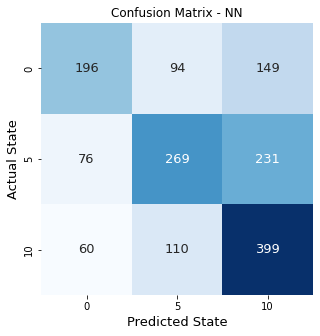

In [49]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test_temp, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar= False, square = True, 
                      fmt = 'g', annot_kws = {'size': 13})

ax.set_title('Confusion Matrix - NN')
ax.set_xlabel('Predicted State', size = 13)
ax.set_ylabel('Actual State', size = 13)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','5', '10'])
ax.yaxis.set_ticklabels(['0','5', '10'])

## Display the visualization of the Confusion Matrix.
plt.show()